In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer

/home/teresa/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
songs = pd.read_csv("../songs_25.csv")
songs

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...
...,...,...,...,...,...,...,...,...,...
6795,6795,ZZ Top,36-22-36,what what what you want? hey my thing is a ...,646,Rock,Pop,True,real fine real fine round thing thing thing th...
6796,6796,ZZ Top,Deal Goin' Down,when the deal goin' down and you gonna take yo...,746,Rock,Pop,True,deal chance mystery trance future deal deal no...
6797,6797,ZZ Top,Can't Stop Rockin',i heard about the rock for sometime i know. ...,995,Rock,Pop,True,easy wrong right low loose high rock roll rock...
6798,6798,ZZ Top,I Got The Message,i'm picking up on a signal that's in the air ...,495,Rock,Pop,True,straight electric about empty straight straigh...


In [37]:
len(np.unique(songs.Genre2))

10

In [61]:
c = Counter(songs.artists).most_common()[10:]

In [63]:
sample = songs.copy()
for el in c:
    sample = sample[sample.artists!=el[0]]
sample

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,length
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...,large
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...,medium
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...,large
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...,large
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...,short
...,...,...,...,...,...,...,...,...,...,...
245,245,America,Love And Leaving,(gerry beckley and bill mumy) hey slim how ...,1046,Rock,Pop,True,first close new cool clear concealing revealin...,medium
246,246,America,Hat Trick,you can i make it known i'd like to take you...,1773,Rock,Pop,True,known local little little worthwhile little wo...,large
247,247,America,Till The Sun Comes Up Again,think i'll write a different song got a feeli...,706,Rock,Pop,True,different long bad song feeling time singin se...,short
248,248,America,"Look Up, Look Down",author unknown (sung by gerry beckley) found ...,880,Rock,Pop,True,second second whole wide second second tired a...,short


In [79]:
sample = songs.sample(frac=.25)
sample

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,length
6285,6285,UB40,Maybe Tomorrow,i don't know how many stars there are up in t...,1388,Reggae,Pop,True,many heavenly beautiful sky heaven earth time ...,medium
2861,2861,Janis Joplin,See See Rider,and it's hey hey hey she was standin' in the...,795,Rock,Blues,True,good bad good bad good bad kitchen honey morni...,short
6283,6283,UB40,Everything Is Better Now,everything is better now better than is was b...,747,Reggae,Pop,True,golden closed clean fresh open safe serial bad...,short
1905,1905,Eurythmics,Peace Is Just A Word,stop the world turn out the sun i'm so tired...,996,Electronic,Pop,True,tired little world sun world day way peace wor...,short
1065,1065,Christmas Songs,Home On Christmas Day,and now that winter's here soon it will be ch...,1215,Pop,Rock,True,clear high frosted bright silent safe warm ast...,medium
...,...,...,...,...,...,...,...,...,...,...
346,346,Avril Lavigne,Take It,just take it take it. just take it take it. ...,1257,Rock,Pop,True,alone true worried fictional true sorry true s...,medium
4159,4159,Metallica,That Was Just Your Life,like a siren in my head that i was placed to r...,2124,Rock,Electronic,True,blind astray about endless present endless hot...,large
6704,6704,XTC,Life Begins At The Hop,i have learnt there's a magical spot at the ho...,593,Electronic,Rock,True,magical good cheap young next ridiculous spot ...,short
5657,5657,Rod Stewart,Hotel Chambermaid,when the lights are low you know i'm going to ...,1087,Rock,Pop,True,low dead hotel garden night river rolling wind...,medium


In [80]:
def visualize_tsne(X_embedded, hue, figname):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    num = len(np.unique(hue))
    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=hue, marker="o", palette=sns.color_palette("hls", num))
    plt.title("Songtexte")
    plt.savefig(figname)
    plt.show()

In [81]:
data = TfidfVectorizer().fit_transform(sample.POS.values.astype(str))

X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(data)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 1700 samples in 0.002s...
[t-SNE] Computed neighbors for 1700 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1700
[t-SNE] Computed conditional probabilities for sample 1700 / 1700
[t-SNE] Mean sigma: 0.014540
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 106.6537018, gradient norm = 0.0021428 (50 iterations in 0.293s)
[t-SNE] Iteration 100: error = 96.4606323, gradient norm = 0.0171667 (50 iterations in 0.273s)
[t-SNE] Iteration 150: error = 89.4889450, gradient norm = 0.0085276 (50 iterations in 0.252s)
[t-SNE] Iteration 200: error = 86.4510040, gradient norm = 0.0050828 (50 iterations in 0.230s)
[t-SNE] Iteration 250: error = 84.5734329, gradient norm = 0.0046859 (50 iterations in 0.241s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.573433
[t-SNE] Iteration 300: error = 3.7542572, gradient norm = 0.0061754 (50 iterations in 0.209s)

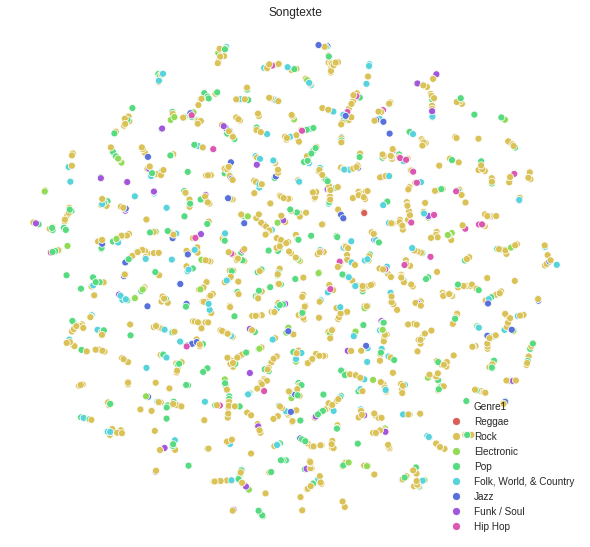

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1700 samples in 0.002s...
[t-SNE] Computed neighbors for 1700 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1700
[t-SNE] Computed conditional probabilities for sample 1700 / 1700
[t-SNE] Mean sigma: 0.025382
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 96.3175125, gradient norm = 0.0001346 (50 iterations in 0.319s)
[t-SNE] Iteration 100: error = 89.9795456, gradient norm = 0.0069449 (50 iterations in 0.355s)
[t-SNE] Iteration 150: error = 87.6244659, gradient norm = 0.0011944 (50 iterations in 0.256s)
[t-SNE] Iteration 200: error = 87.3145599, gradient norm = 0.0015923 (50 iterations in 0.258s)
[t-SNE] Iteration 250: error = 87.1622086, gradient norm = 0.0010947 (50 iterations in 0.254s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.162209
[t-SNE] Iteration 300: error = 3.4156041, gradient norm = 0.0062683 (50 iterations in 0.231s)

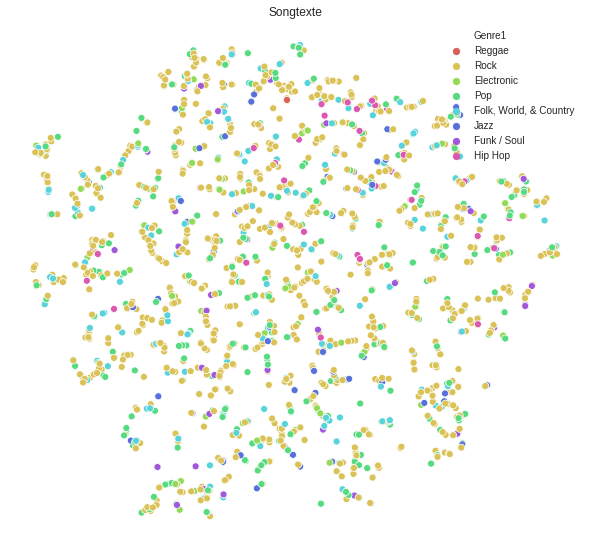

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1700 samples in 0.002s...
[t-SNE] Computed neighbors for 1700 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1700
[t-SNE] Computed conditional probabilities for sample 1700 / 1700
[t-SNE] Mean sigma: 0.032052
[t-SNE] Computed conditional probabilities in 0.047s
[t-SNE] Iteration 50: error = 88.1869888, gradient norm = 0.0000480 (50 iterations in 0.372s)
[t-SNE] Iteration 100: error = 84.1061630, gradient norm = 0.0038718 (50 iterations in 0.354s)
[t-SNE] Iteration 150: error = 83.0537872, gradient norm = 0.0010966 (50 iterations in 0.260s)
[t-SNE] Iteration 200: error = 82.9621124, gradient norm = 0.0005714 (50 iterations in 0.252s)
[t-SNE] Iteration 250: error = 82.9268875, gradient norm = 0.0004430 (50 iterations in 0.257s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.926888
[t-SNE] Iteration 300: error = 2.9716396, gradient norm = 0.0059667 (50 iterations in 0.311s)

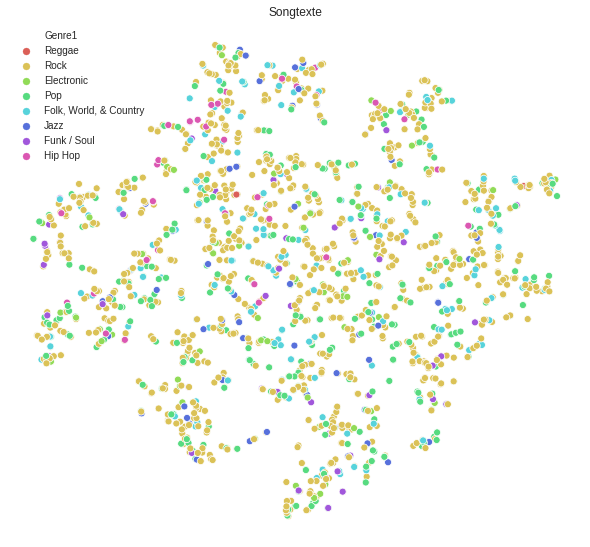

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1700 samples in 0.002s...
[t-SNE] Computed neighbors for 1700 samples in 0.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1700
[t-SNE] Computed conditional probabilities for sample 1700 / 1700
[t-SNE] Mean sigma: 0.042473
[t-SNE] Computed conditional probabilities in 0.125s
[t-SNE] Iteration 50: error = 75.0003815, gradient norm = 0.0000039 (50 iterations in 0.609s)
[t-SNE] Iteration 100: error = 74.3675537, gradient norm = 0.0042148 (50 iterations in 0.394s)
[t-SNE] Iteration 150: error = 73.5131760, gradient norm = 0.0001920 (50 iterations in 0.420s)
[t-SNE] Iteration 200: error = 73.4913483, gradient norm = 0.0000335 (50 iterations in 0.462s)
[t-SNE] Iteration 250: error = 73.4915161, gradient norm = 0.0000095 (50 iterations in 0.321s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.491516
[t-SNE] Iteration 300: error = 2.1917727, gradient norm = 0.0052887 (50 iterations in 0.304s)

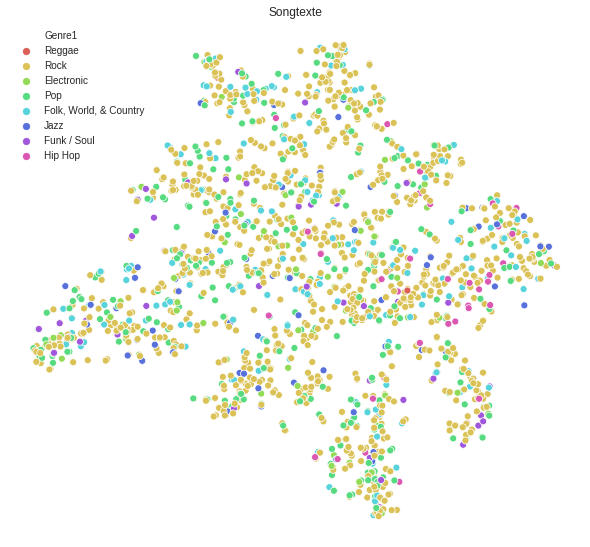

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1700 samples in 0.002s...
[t-SNE] Computed neighbors for 1700 samples in 0.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1700
[t-SNE] Computed conditional probabilities for sample 1700 / 1700
[t-SNE] Mean sigma: 0.045553
[t-SNE] Computed conditional probabilities in 0.197s
[t-SNE] Iteration 50: error = 71.4986038, gradient norm = 0.0000014 (50 iterations in 0.513s)
[t-SNE] Iteration 100: error = 71.4790115, gradient norm = 0.0011566 (50 iterations in 0.442s)
[t-SNE] Iteration 150: error = 70.6910934, gradient norm = 0.0004015 (50 iterations in 0.445s)
[t-SNE] Iteration 200: error = 70.6685638, gradient norm = 0.0001511 (50 iterations in 0.378s)
[t-SNE] Iteration 250: error = 70.6721497, gradient norm = 0.0000359 (50 iterations in 0.400s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.672150
[t-SNE] Iteration 300: error = 2.0214593, gradient norm = 0.0052531 (50 iterations in 0.348s

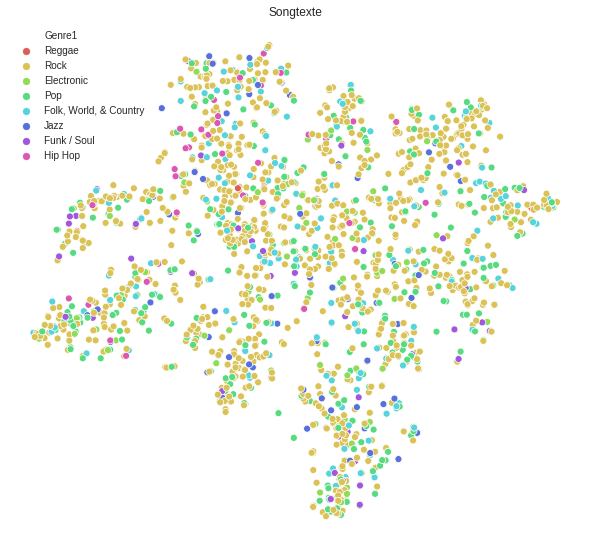

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1700 samples in 0.002s...
[t-SNE] Computed neighbors for 1700 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1700
[t-SNE] Computed conditional probabilities for sample 1700 / 1700
[t-SNE] Mean sigma: 0.048106
[t-SNE] Computed conditional probabilities in 0.218s
[t-SNE] Iteration 50: error = 68.7737503, gradient norm = 0.0000004 (50 iterations in 0.443s)
[t-SNE] Iteration 100: error = 68.7735748, gradient norm = 0.0000976 (50 iterations in 0.517s)
[t-SNE] Iteration 150: error = 68.3799973, gradient norm = 0.0004540 (50 iterations in 0.543s)
[t-SNE] Iteration 200: error = 68.3283539, gradient norm = 0.0000394 (50 iterations in 0.544s)
[t-SNE] Iteration 250: error = 68.3263168, gradient norm = 0.0000595 (50 iterations in 0.647s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.326317
[t-SNE] Iteration 300: error = 1.9389759, gradient norm = 0.0056213 (50 iterations in 0.460s

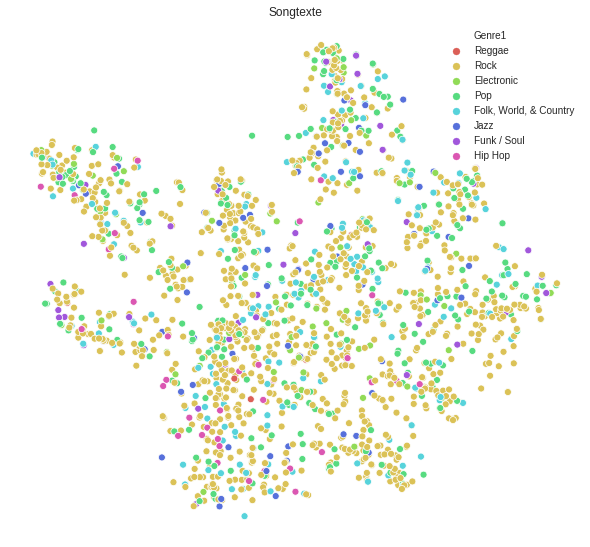

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1700 samples in 0.002s...
[t-SNE] Computed neighbors for 1700 samples in 0.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1700
[t-SNE] Computed conditional probabilities for sample 1700 / 1700
[t-SNE] Mean sigma: 0.057377
[t-SNE] Computed conditional probabilities in 0.397s
[t-SNE] Iteration 50: error = 60.2828979, gradient norm = 0.0000000 (50 iterations in 0.557s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 60.282898
[t-SNE] Iteration 100: error = 2.5327146, gradient norm = 0.0048894 (50 iterations in 0.598s)
[t-SNE] Iteration 150: error = 1.2716242, gradient norm = 0.0029894 (50 iterations in 0.570s)
[t-SNE] Iteration 200: error = 1.1032534, gradient norm = 0.0013130 (50 iterations in 0.538s)
[t-SNE] Iteration 250: error = 1.0416744, gradient norm = 0.0007328 (50 iterations in 0.527s)
[t-SNE] Iteration 300: error = 1.0125008,

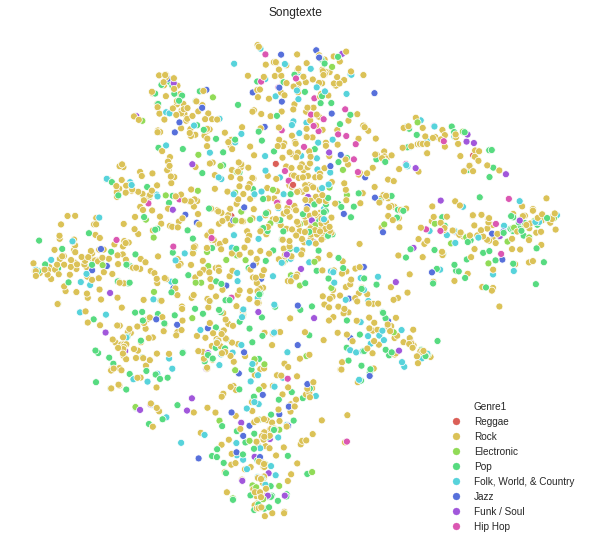

In [82]:
perplexity = [2,5,10,30,40,50,100]

# perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, n_iter=1000,learning_rate=10, verbose=2).fit_transform(X_reduced)
    figname = "tsne_sample_pos_genre1_perplexity"+str(p)
    visualize_tsne(X_embedded, sample.Genre1, figname)

In [58]:
songs['length']="0"

for i, row in songs.iterrows():
    if row.number_of_tokens >1500:
        songs.at[i, 'length'] = "large"
    elif row.number_of_tokens >=1000 and row.number_of_tokens<1500:
        songs.at[i, 'length'] = "medium"
    elif row.number_of_tokens < 1000:
        songs.at[i, 'length'] = "short"
songs

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,length
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...,large
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...,medium
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...,large
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...,large
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...,short
...,...,...,...,...,...,...,...,...,...,...
6795,6795,ZZ Top,36-22-36,what what what you want? hey my thing is a ...,646,Rock,Pop,True,real fine real fine round thing thing thing th...,short
6796,6796,ZZ Top,Deal Goin' Down,when the deal goin' down and you gonna take yo...,746,Rock,Pop,True,deal chance mystery trance future deal deal no...,short
6797,6797,ZZ Top,Can't Stop Rockin',i heard about the rock for sometime i know. ...,995,Rock,Pop,True,easy wrong right low loose high rock roll rock...,short
6798,6798,ZZ Top,I Got The Message,i'm picking up on a signal that's in the air ...,495,Rock,Pop,True,straight electric about empty straight straigh...,short
